In [1]:
# 세련된 데이터 시각화 패키지, Plotly.
# !pip install plotly
# !pip install cufflinks
# !pip install sort-dataframeby-monthorweek
# !pip install sorted-months-weekdays

In [891]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import multiprocessing #프로세스를 생성하기 때문에 GIL (Global Interpreter Lock)을 피하고 시스템의 여러 프로세서를 최대한 활용할 수 있다
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [892]:
plt.style.use(['seaborn-whitegrid'])

# 데이터 불러오기

In [992]:
df = pd.read_csv('C:/workspace/R/2.Python/PROJECT/Project_Vol_2/hotel_bookings_cancel.csv')

In [961]:
df.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,342,July,1,0,0,2,0.0,0,BB,...,C,C,3,No Deposit,NaN,Transient,0.0,0,0,Check-Out
1,0,737,July,1,0,0,2,0.0,0,BB,...,C,C,4,No Deposit,NaN,Transient,0.0,0,0,Check-Out
2,0,7,July,1,0,1,1,0.0,0,BB,...,A,C,0,No Deposit,NaN,Transient,75.0,0,0,Check-Out
3,0,13,July,1,0,1,1,0.0,0,BB,...,A,A,0,No Deposit,304.0,Transient,75.0,0,0,Check-Out
4,0,14,July,1,0,2,2,0.0,0,BB,...,A,A,0,No Deposit,240.0,Transient,98.0,0,1,Check-Out


In [222]:
df.shape

(119390, 24)

In [962]:
df.describe()

,is_canceled,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,101.831122,0.062518,0.571363
std,0.482918,106.863097,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,50.535790,0.245291,0.792798
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,5400.000000,8.000000,5.000000


In [963]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119386 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

# 기본적인 전처리(소연 & 동렬 작업)

In [993]:
df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].fillna(-1)

In [994]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

# 어떤 시즌에 많이 오는가?(예제)

In [966]:
season = df[df['is_canceled']==0] 

In [967]:
season.shape

(75166, 24)

In [968]:
season_month = season.groupby(['arrival_date_month'])['adr'].mean().reset_index()

In [969]:
# 월별 평균 숙박 이용 금액 
season_month

,arrival_date_month,adr
0,April,97.877849
1,August,142.088795
2,December,78.920238
3,February,72.419429
4,January,67.001050
5,July,129.253758
6,June,114.589636
7,March,77.331574
8,May,104.842342
9,November,70.505169


In [970]:
season_month.columns=['month','price']

In [971]:
season_month

,month,price
0,April,97.877849
1,August,142.088795
2,December,78.920238
3,February,72.419429
4,January,67.001050
5,July,129.253758
6,June,114.589636
7,March,77.331574
8,May,104.842342
9,November,70.505169


In [972]:
# 데이터 프레임 월,주별 정렬 클래스
import sort_dataframeby_monthorweek as sd

In [973]:
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [974]:
season_month = sort_month(season_month, 'month')

In [975]:
plt. figure(figsize = (20, 10))
px.line(season_month, x='month', y = 'price', title = 'Room price per night over the Months', template = 'plotly_dark')

<Figure size 1440x720 with 0 Axes>

# 취소 고객 분석 - 예약 경로(Idea_1)

In [976]:
filter = df['is_canceled'] == 1
cancel_costomers = df[filter]

In [977]:
cancel_costomers.shape

(44224, 24)

In [978]:
# agg를 사용하면 나머지 잔여 columns를 살려둠
cancel = cancel_costomers.groupby(['market_segment']).agg('count').reset_index()
# iloc(columns 남김) <-> loc(columns 탈락)
cancel = cancel.iloc[:, :2]
cancel = cancel.rename(columns= {'is_canceled' : 'Num_of_canceled'})

In [979]:
cancel

,market_segment,Num_of_canceled
0,Aviation,52
1,Complementary,97
2,Corporate,992
3,Direct,1934
4,Groups,12097
5,Offline TA/TO,8311
6,Online TA,20739
7,Undefined,2


In [980]:
cancel = cancel.sort_values(by='Num_of_canceled',ascending=0)

In [981]:
cancel

,market_segment,Num_of_canceled
6,Online TA,20739
4,Groups,12097
5,Offline TA/TO,8311
3,Direct,1934
2,Corporate,992
1,Complementary,97
0,Aviation,52
7,Undefined,2


In [982]:
# 시각화
px.bar(data_frame = cancel , x = "market_segment", y = "Num_of_canceled", template = 'plotly_dark')

# 얼마나 오래 머무는가? (예제)

In [983]:
filter = df['is_canceled'] == 0

In [984]:
long = df[filter]

In [985]:
long.shape

(75166, 24)

In [986]:
long.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,0,342,July,1,0,0,2,0.0,0,BB,...,C,C,3,No Deposit,-1.0,Transient,0.0,0,0,Check-Out
1,0,737,July,1,0,0,2,0.0,0,BB,...,C,C,4,No Deposit,-1.0,Transient,0.0,0,0,Check-Out
2,0,7,July,1,0,1,1,0.0,0,BB,...,A,C,0,No Deposit,-1.0,Transient,75.0,0,0,Check-Out
3,0,13,July,1,0,1,1,0.0,0,BB,...,A,A,0,No Deposit,304.0,Transient,75.0,0,0,Check-Out
4,0,14,July,1,0,2,2,0.0,0,BB,...,A,A,0,No Deposit,240.0,Transient,98.0,0,1,Check-Out


In [987]:
long['total_nights'] = long['stays_in_weekend_nights'] + long['stays_in_week_nights']

<ipython-input-987-878c12a63878>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [988]:
long.shape

(75166, 25)

In [989]:
stay = long.groupby(['total_nights']).agg('count').reset_index()
stay = stay.iloc[:, :2]
stay = stay.rename(columns={'is_canceled':'Num_of_stays'})
stay

,total_nights,Num_of_stays
0,0,680
1,1,15749
2,2,15480
3,3,15725
4,4,11025
5,5,5121
6,6,2322
7,7,5686
8,8,720
9,9,528


In [991]:
fig = px.bar(data_frame = stay, x = 'total_nights', y = 'Num_of_stays',
        template = 'plotly_dark')
fig.update_xaxes(range=[0, 15], tickangle = 45)
fig.update_yaxes(dtick=5000)

# 취소 고객 분석 - 입금 형태(Idea_2)

In [995]:
filter = df['is_canceled'] == 1
cancel_costomers = df[filter]

In [996]:
cancel_costomers.shape

(44224, 24)

In [ ]:
# agg를 사용하면 나머지 잔여 columns를 살려둠
cancel = cancel_costomers.groupby(['market_segment']).agg('count').reset_index()
# iloc(columns 남김) <-> loc(columns 탈락)
cancel = cancel.iloc[:, :2]
cancel = cancel.rename(columns= {'is_canceled' : 'Num_of_canceled'})

# 머신러닝 준비

lead_time 큰 하락 customer 하락 , marketsegment 하락// adr 상승

In [902]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   arrival_date_day_of_month       119390 non-null  int64  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  float64
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  object 
 10  market_segment                  119390 non-null  object 
 11  is_repeated_guest               119390 non-null  int64  
 12  previous_cancell

In [903]:
filter = df['agent'] == -1

In [904]:
df_0 = df[filter]

In [905]:
df_0['agent'][:] = np.zeros(len(df_0), dtype=int) 

<ipython-input-905-86eeee76fee2>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:998: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [906]:
len(df_0)

16340

In [907]:
filter = df['agent'] != -1

In [908]:
df_1 = df[filter]

In [909]:
df_1['agent'][:] = np.ones(len(df_1), dtype=int)

<ipython-input-909-4032497a9352>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:998: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [910]:
len(df_1)

103050

In [911]:
df = df_1.append(df_0)

In [912]:
df['agent'].value_counts()

1    103050
0     16340
Name: agent, dtype: int64

In [913]:
df['kids'] = df["children"] + df["babies"]

In [914]:
df.loc[df.kids != 0, 'kids'] = 1

In [915]:
df['kids'].value_counts()

0.0    110058
1.0      9332
Name: kids, dtype: int64

In [916]:
df['market_segment'].value_counts()

Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743
Aviation           237
Undefined            2
Name: market_segment, dtype: int64

In [917]:
df["total_guest"] = df["adults"] + df["children"] + df["babies"]
df_ml = df.drop(["adults","arrival_date_day_of_month","children","babies","assigned_room_type","reservation_status",'reserved_room_type','required_car_parking_spaces','total_of_special_requests'], axis =1)

In [918]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 3 to 119116
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   lead_time                       119390 non-null  int64  
 2   arrival_date_month              119390 non-null  object 
 3   stays_in_weekend_nights         119390 non-null  int64  
 4   stays_in_week_nights            119390 non-null  int64  
 5   meal                            119390 non-null  object 
 6   market_segment                  119390 non-null  object 
 7   is_repeated_guest               119390 non-null  int64  
 8   previous_cancellations          119390 non-null  int64  
 9   previous_bookings_not_canceled  119390 non-null  int64  
 10  booking_changes                 119390 non-null  int64  
 11  deposit_type                    119390 non-null  object 
 12  agent           

In [919]:
# X , y 분리

In [920]:
X = df_ml.drop(['is_canceled'], axis =1)

In [921]:
X.shape

(119390, 16)

In [922]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 3 to 119116
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   arrival_date_month              119390 non-null  object 
 2   stays_in_weekend_nights         119390 non-null  int64  
 3   stays_in_week_nights            119390 non-null  int64  
 4   meal                            119390 non-null  object 
 5   market_segment                  119390 non-null  object 
 6   is_repeated_guest               119390 non-null  int64  
 7   previous_cancellations          119390 non-null  int64  
 8   previous_bookings_not_canceled  119390 non-null  int64  
 9   booking_changes                 119390 non-null  int64  
 10  deposit_type                    119390 non-null  object 
 11  agent                           119390 non-null  int32  
 12  customer_type   

In [923]:
y = df_ml['is_canceled']

In [924]:
y.shape

(119390,)

In [925]:
# 범주형 데이터 전환

In [926]:
X = pd.get_dummies(X)

In [927]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119390 entries, 3 to 119116
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   lead_time                       119390 non-null  int64  
 1   stays_in_weekend_nights         119390 non-null  int64  
 2   stays_in_week_nights            119390 non-null  int64  
 3   is_repeated_guest               119390 non-null  int64  
 4   previous_cancellations          119390 non-null  int64  
 5   previous_bookings_not_canceled  119390 non-null  int64  
 6   booking_changes                 119390 non-null  int64  
 7   agent                           119390 non-null  int32  
 8   adr                             119390 non-null  float64
 9   kids                            119390 non-null  float64
 10  total_guest                     119390 non-null  float64
 11  arrival_date_month_April        119390 non-null  uint8  
 12  arrival_date_mon

In [928]:
# train_test split()

In [929]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [930]:
X_train.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,kids,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
79947,59,0,1,0,0,0,0,1,80.00,0.0,...,1,0,0,1,0,0,0,0,0,1
82094,7,0,1,0,0,0,2,0,79.00,0.0,...,0,0,0,1,0,0,0,0,1,0
67750,422,0,1,0,0,0,0,1,90.00,0.0,...,0,0,0,0,1,0,0,0,1,0
13455,58,0,4,0,0,0,0,1,225.60,0.0,...,0,1,0,1,0,0,0,0,1,0
41711,8,2,4,0,0,0,0,1,105.67,0.0,...,0,1,0,1,0,0,1,0,0,0


In [931]:
X_test.head()

,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,adr,kids,...,market_segment_Offline TA/TO,market_segment_Online TA,market_segment_Undefined,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
39031,327,2,7,0,0,0,0,1,174.80,0.0,...,0,1,0,1,0,0,0,0,1,0
48949,88,1,3,0,0,0,0,1,180.63,1.0,...,0,1,0,1,0,0,0,0,1,0
4387,11,1,0,0,0,0,0,0,40.00,0.0,...,0,0,0,1,0,0,0,0,1,0
99895,18,0,1,0,0,0,2,1,60.00,0.0,...,1,0,0,1,0,0,0,0,0,1
32677,10,1,1,0,0,0,0,0,120.00,0.0,...,0,0,0,1,0,0,0,0,0,1


In [932]:
y_train.head(), y_test.head()

(79947    0
 82094    0
 67750    1
 13455    1
 41711    0
 Name: is_canceled, dtype: int64,
 39031    0
 48949    1
 4387     1
 99895    0
 32677    0
 Name: is_canceled, dtype: int64)

클래스 불균형 처리를 해주는 imbalanced-learn를 호출

적은 클래스의 데이터 수를 증가시키는 Oversampling

많은 클래스의 데이터 수를 감소시키는 Undersampling

In [933]:
# !pip install imblearn

In [934]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler()

In [935]:
X_train, y_train = over.fit_resample(X_train, y_train)
df_sample = pd.DataFrame(X_train, columns=X_train.columns)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



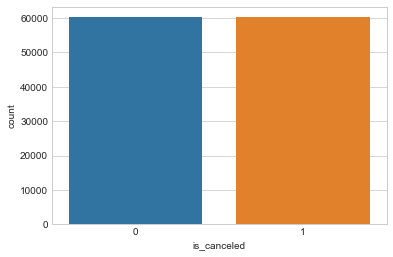

In [936]:
sns.countplot(y_train);

# 로지스틱 회귀

In [937]:
from sklearn.linear_model import LogisticRegression

In [938]:
lr = LogisticRegression()

In [939]:
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [940]:
print('훈련 데이터 점수 : {}'.format(lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.7390127229844201
평가 데이터 점수 : 0.7578942960046905


scaling

In [941]:
scaler = StandardScaler()

In [942]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [943]:
lr.fit(X_train_s, y_train)

LogisticRegression()

In [944]:
print('훈련 데이터 점수 : {}'.format(lr.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(lr.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.7401837026210012
평가 데이터 점수 : 0.7609096239216014


# SGD 경사하강법

In [945]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(loss='log'))
# 로지스틱 회귀를 사용하므로 loss = log

In [946]:
sgd.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(loss='log'))])

In [947]:
print("학습 데이터 점수 : {}".format(sgd.score(X_train,y_train)))
print("평가 데이터 점수 : {}".format(sgd.score(X_test,y_test)))

학습 데이터 점수 : 0.7274274989203734
평가 데이터 점수 : 0.7560515956110228


# KNN
- 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트 출력
- k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

In [948]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE

In [949]:
kn = KNeighborsClassifier()

In [950]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [367]:
print('훈련 데이터 점수 : {}'.format(kn.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(kn.score(X_test, y_test)))

훈련 데이터 점수 : 0.8482709364515164
평가 데이터 점수 : 0.7298349945556579


scaling

In [951]:
scaler = StandardScaler()

In [952]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [953]:
kn.fit(X_train_s, y_train)

KNeighborsClassifier()

In [494]:
print('훈련 데이터 점수 : {}'.format(kn.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(kn.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.869486655945648
평가 데이터 점수 : 0.7869587067593601


# 의사결정 나무
- 데이터 특성으로 부타 추론된 결정 규칙을 통해 값을 예측
- if-then-else 결정 규칙을 통해 데이터 학습
- 나무 깊이가 깊을 수록 복잡한 모델
- 결정트리 장점
    - 이해와 해석이 쉽다
    - 시각화가 용이 하다
    - 많은 데이터 전처리가 필요하지 않다
    - 수치형과 범주형 데이터 모두를 다룰 수 있다.

In [372]:
import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

전처리 없이 학습

In [954]:
dt = DecisionTreeClassifier()

In [955]:
cross_val_score(
estimator=dt ,
X=X_train, y=y_train, cv=5,n_jobs=multiprocessing.cpu_count())

array([0.83266204, 0.83519495, 0.8407109 , 0.89539905, 0.89058218])

전처리 후 학습

In [956]:
dt = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [957]:
cross_val_score(
estimator= dt,
X=X_train, y=y_train, cv=5,n_jobs=multiprocessing.cpu_count())

array([0.83241291, 0.83465515, 0.84017108, 0.89402874, 0.89024998])

In [958]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [959]:
print('훈련 데이터 점수 : {}'.format(dt.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(dt.score(X_test, y_test)))

훈련 데이터 점수 : 0.9897269375145334
평가 데이터 점수 : 0.7899321551218695


# SVC

In [501]:
from sklearn.svm import SVC

In [502]:
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

In [503]:
svc = SVC()

In [505]:
svc.fit(X_train_s, y_train)

SVC()

In [506]:
print('훈련 데이터 점수 : {}'.format(svc.score(X_train_s, y_train)))
print('평가 데이터 점수 : {}'.format(svc.score(X_test_s, y_test)))

훈련 데이터 점수 : 0.7790054749471478
평가 데이터 점수 : 0.7998157299606332
